In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('reg_data.csv')

In [5]:
df.head()

,X_1,y
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


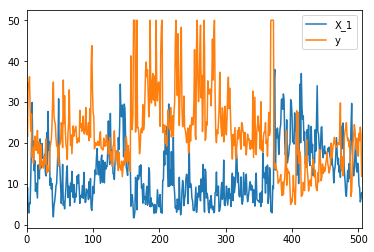

In [6]:
df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A93D9FAE48>,
      dtype=object)

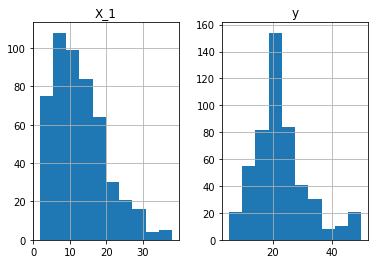

In [7]:
df.hist()

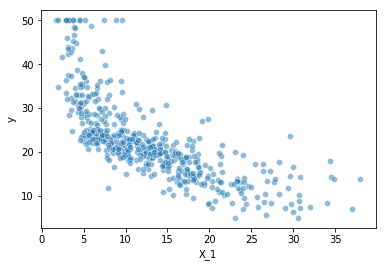

In [9]:
sns.scatterplot(x=df['X_1'], y=df.y, alpha=0.5)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [13]:
X = scaler_X.fit_transform(df.X_1.values.reshape(-1, 1))

In [14]:
y = scaler_y.fit_transform(df.y.values.reshape(-1, 1))

In [17]:
X.ravel().shape

(506,)

In [16]:
X.shape

(506, 1)

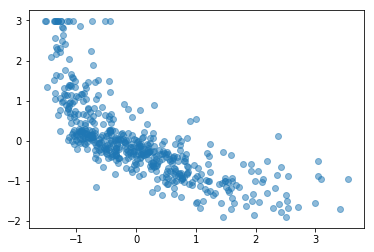

In [21]:
plt.scatter(X, y, alpha=0.5)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg_lin = LinearRegression()

In [26]:
reg_lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
y_pred = reg_lin.predict(X_test)

In [28]:
y_pred

array([[ 0.2919768 ],
       [-0.55086434],
       [ 0.01034452],
       [-0.58992283],
       [-0.48919304],
       [-0.49536017],
       [-0.14280589],
       [ 0.16760634],
       [ 0.61266758],
       [ 0.21488767],
       [ 0.7904865 ],
       [-0.71018188],
       [ 0.76787369],
       [ 0.39887373],
       [ 0.49446425],
       [-1.06581972],
       [ 0.80693218],
       [-0.40388107],
       [ 0.59108262],
       [ 0.01856736],
       [-0.93939355],
       [-0.73073898],
       [-0.5220844 ],
       [-0.21064432],
       [-0.87258297],
       [ 0.62191827],
       [-1.71747983],
       [-0.58683927],
       [-0.37201756],
       [-0.18700365],
       [ 0.27758683],
       [ 1.03819957],
       [-0.34118191],
       [-0.17158583],
       [ 0.86654777],
       [-1.14393671],
       [ 0.85010209],
       [ 0.13677069],
       [ 0.57874836],
       [-0.33398693],
       [ 0.56949766],
       [ 0.28992109],
       [ 0.86449206],
       [ 0.83776783],
       [ 0.91382911],
       [ 0

In [29]:
import helpers as hlp

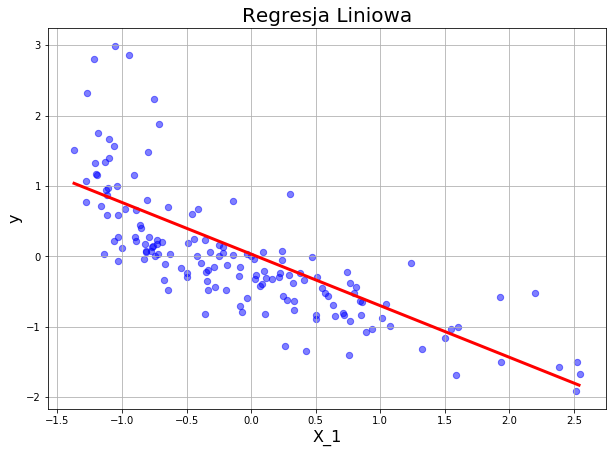

In [30]:
hlp.plot_regression(X=X_test, y=y_test, reg=reg_lin, title='Regresja Liniowa')

# Regresja Wielomianowa

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
poly = PolynomialFeatures(degree = 2)

In [46]:
X_poly = poly.fit_transform(X)

In [47]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3)

In [48]:
reg_poly = LinearRegression()
reg_poly.fit(X_train_poly, y_train_poly)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

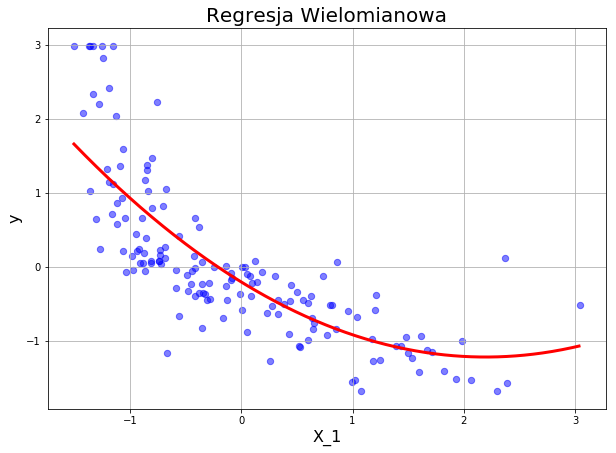

In [49]:
hlp.plot_regression_poly(X_poly=X_test_poly, 
                         y_poly=y_test_poly,
                         poly=poly, 
                         reg=reg_poly, 
                         title='Regresja Wielomianowa')

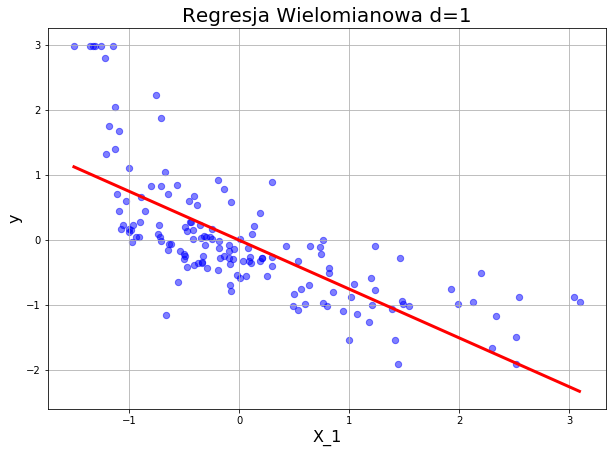

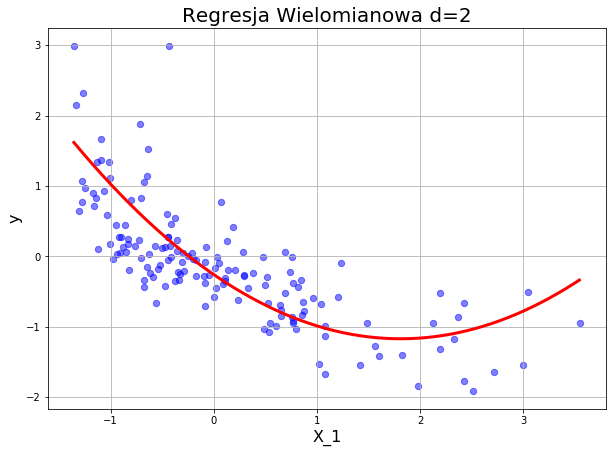

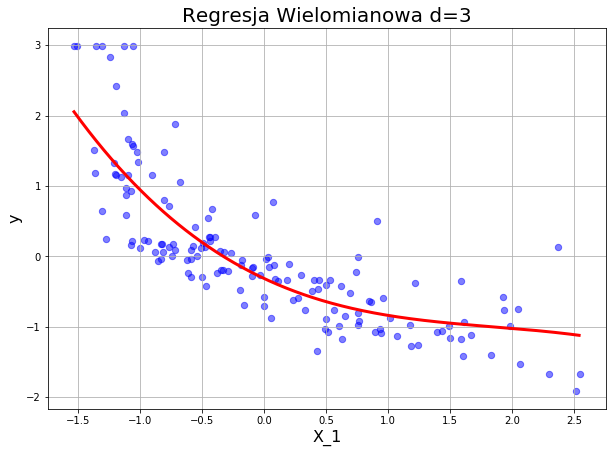

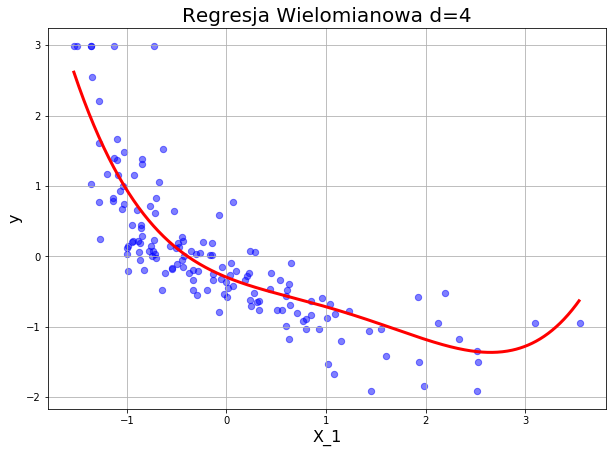

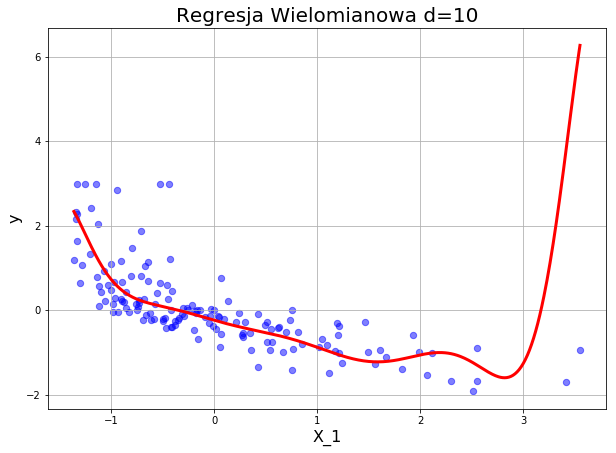

In [52]:
for d in [1, 2, 3, 4, 10]:
    poly = PolynomialFeatures(degree = d)
    X_poly = poly.fit_transform(X)
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3)
    reg_poly = LinearRegression()
    reg_poly.fit(X_train_poly, y_train_poly)
    hlp.plot_regression_poly(X_poly=X_test_poly, 
                         y_poly=y_test_poly,
                         poly=poly, 
                         reg=reg_poly, 
                         title='Regresja Wielomianowa d={}'.format(d))

In [54]:
from sklearn.svm import SVR

C:\Users\Wioletka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Wioletka\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


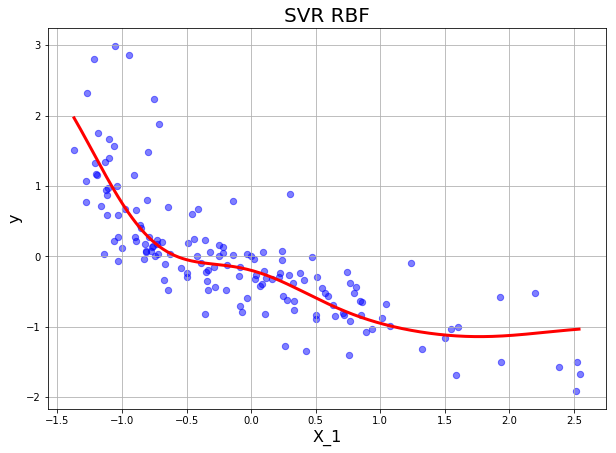

In [55]:
reg_svm = SVR(kernel='rbf')
reg_svm.fit(X_train, y_train)
hlp.plot_regression(X=X_test, y=y_test, reg=reg_svm, title='SVR RBF')

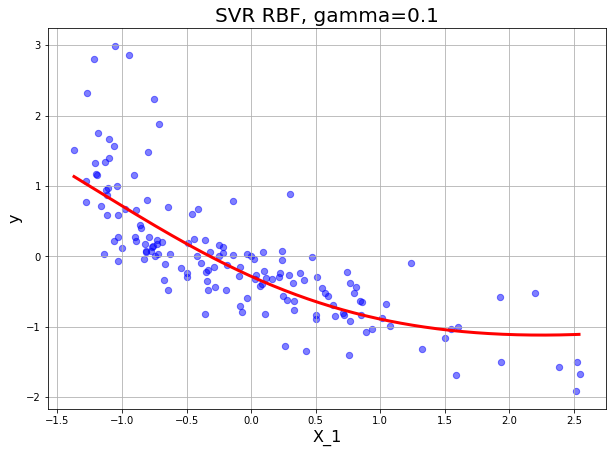

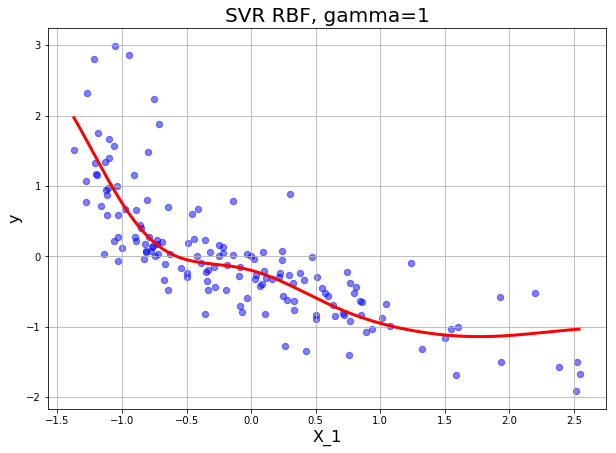

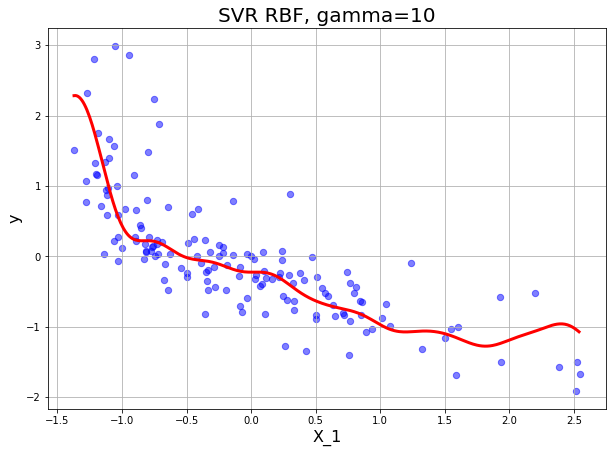

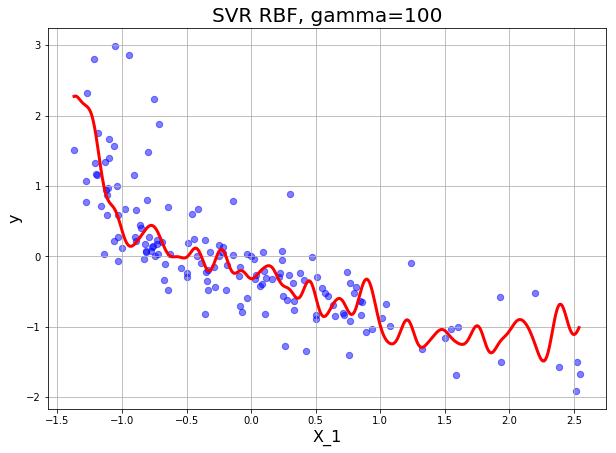

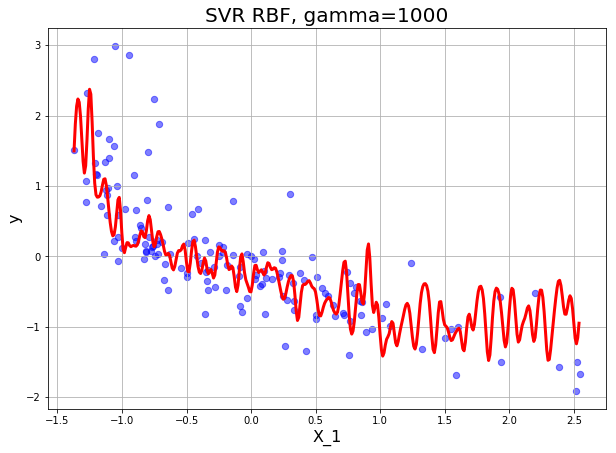

In [60]:
for g in [0.1, 1, 10, 100, 1000]:
    reg_svm = SVR(kernel='rbf', gamma=g)
    reg_svm.fit(X_train, y_train.ravel())
    hlp.plot_regression(X=X_test, y=y_test, reg=reg_svm, title='SVR RBF, gamma={}'.format(g))

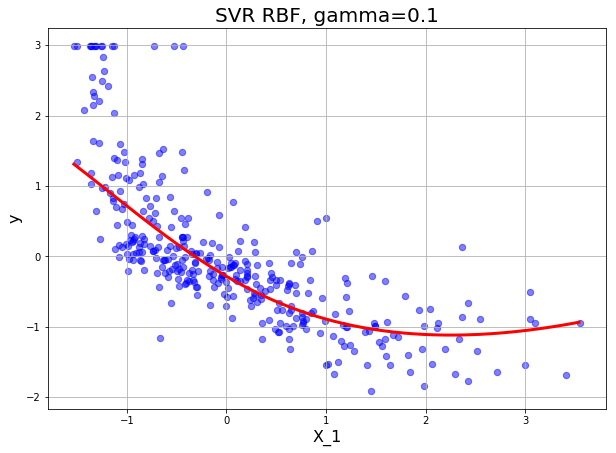

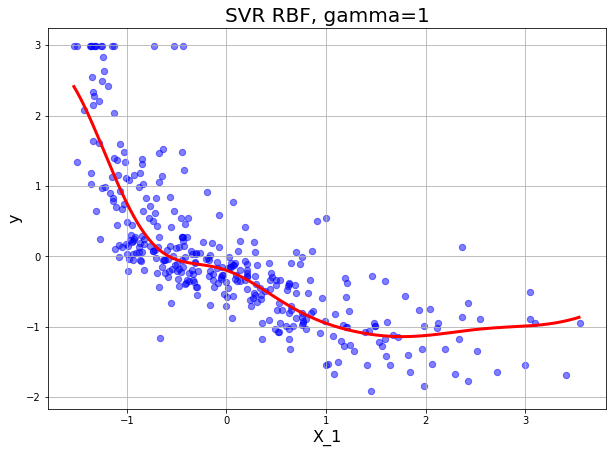

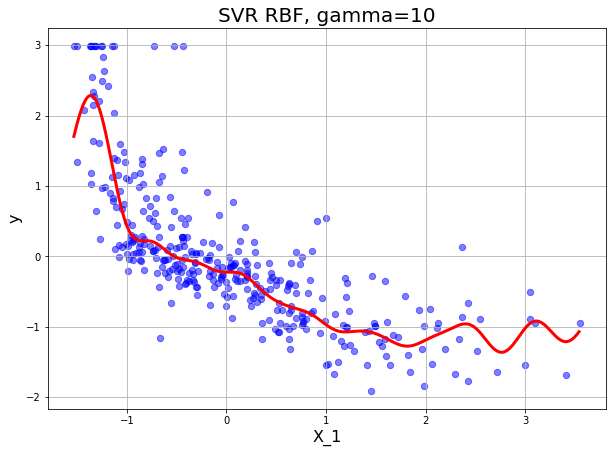

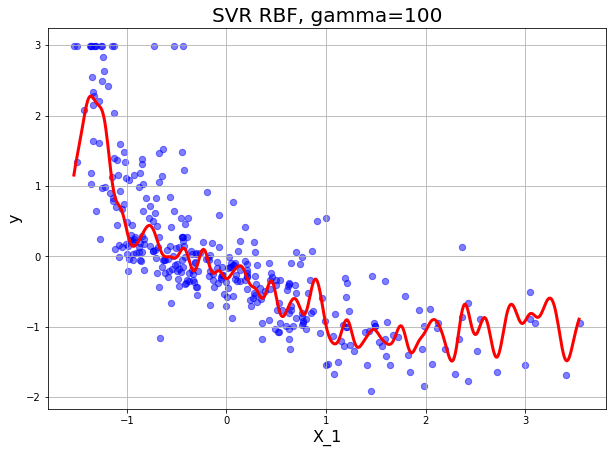

In [59]:
for g in [0.1, 1, 10, 100]:
    reg_svm = SVR(kernel='rbf', gamma=g)
    reg_svm.fit(X_train, y_train.ravel())
    hlp.plot_regression(X=X_train, y=y_train, reg=reg_svm, title='SVR RBF, gamma={}'.format(g))

In [61]:
from sklearn.tree import DecisionTreeRegressor

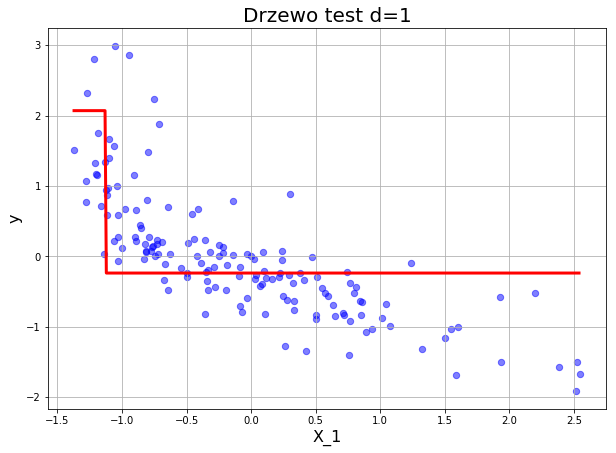

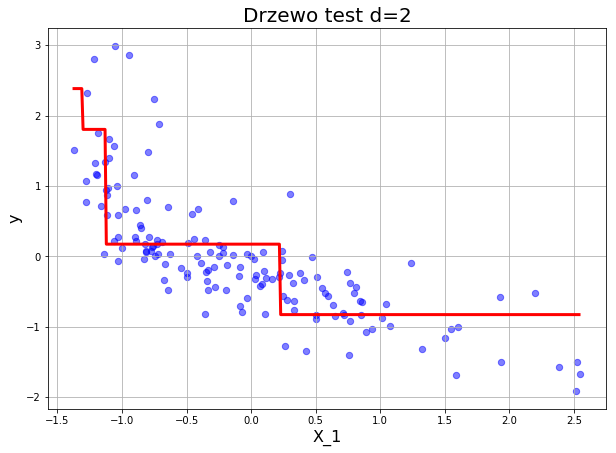

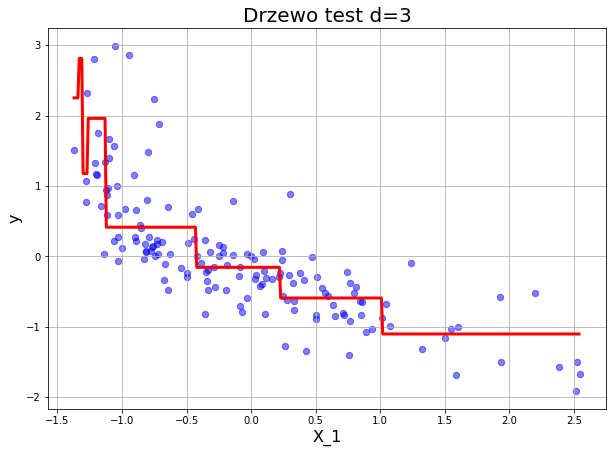

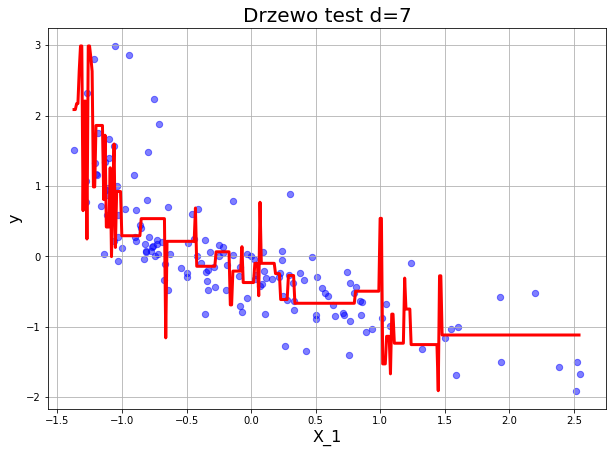

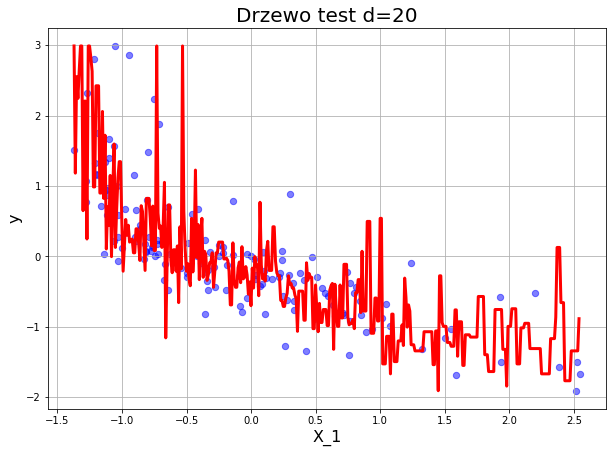

In [65]:
for d in [1, 2, 3, 7, 20]:
    reg_tree = DecisionTreeRegressor(max_depth=d)
    reg_tree.fit(X_train, y_train.ravel())
    hlp.plot_regression(X=X_test, 
                        y=y_test, 
                        reg=reg_tree, 
                        title='Drzewo test d={}'.format(d))

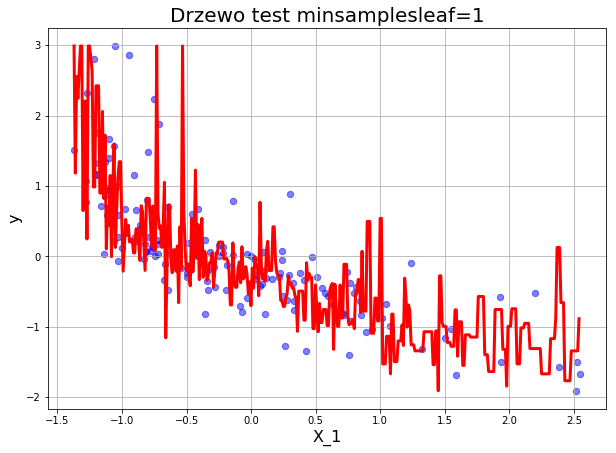

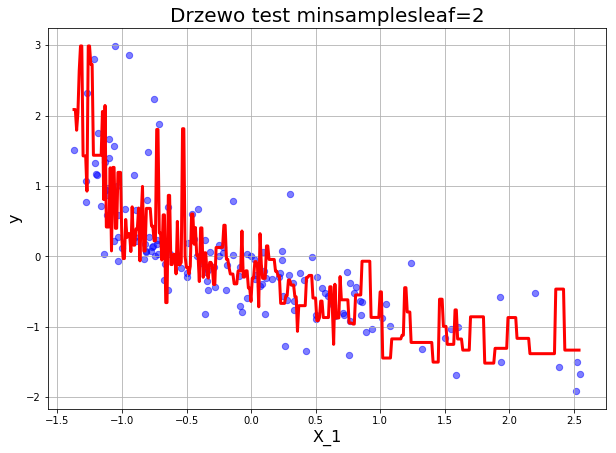

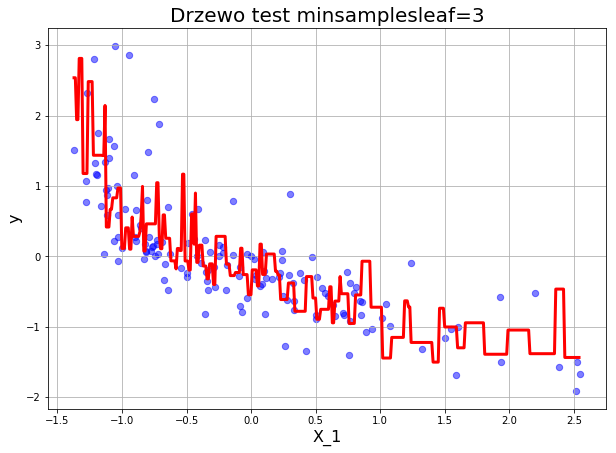

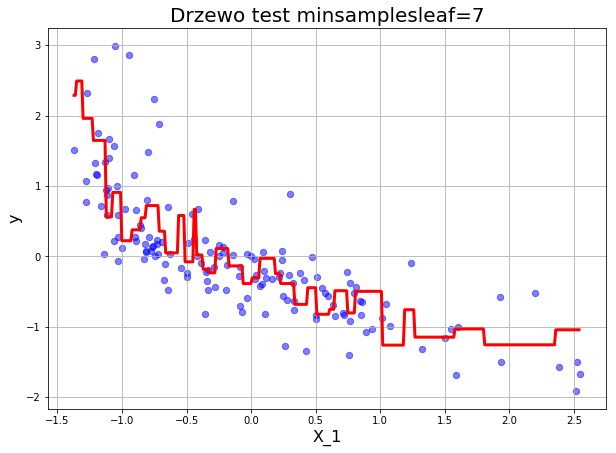

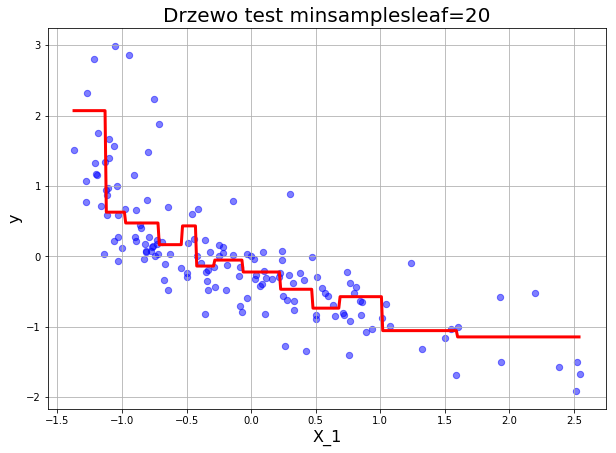

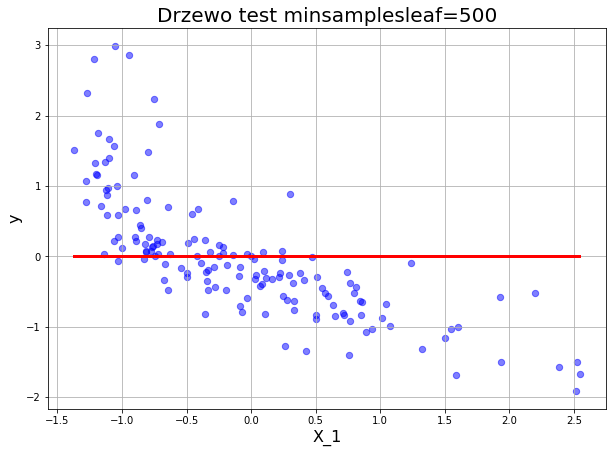

In [67]:
for l in [1, 2, 3, 7, 20, 500]:
    reg_tree = DecisionTreeRegressor(min_samples_leaf=l)
    reg_tree.fit(X_train, y_train.ravel())
    hlp.plot_regression(X=X_test, 
                        y=y_test, 
                        reg=reg_tree, 
                        title='Drzewo test minsamplesleaf={}'.format(l))

In [68]:
from sklearn.ensemble import RandomForestRegressor

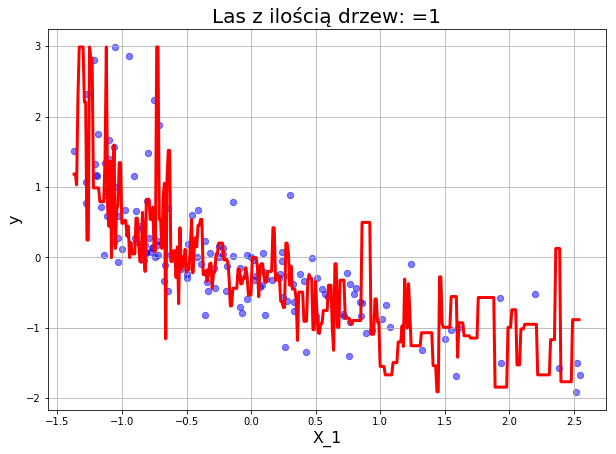

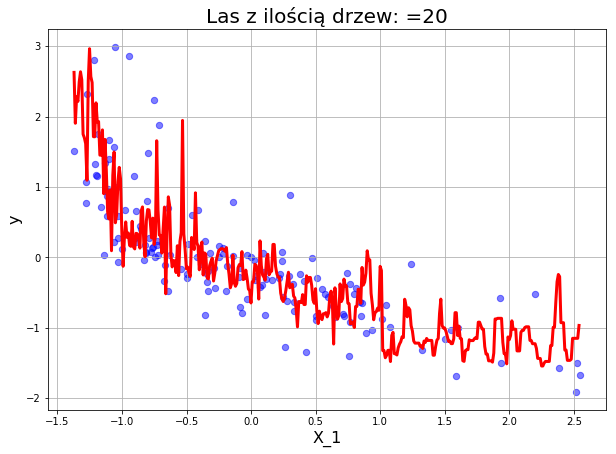

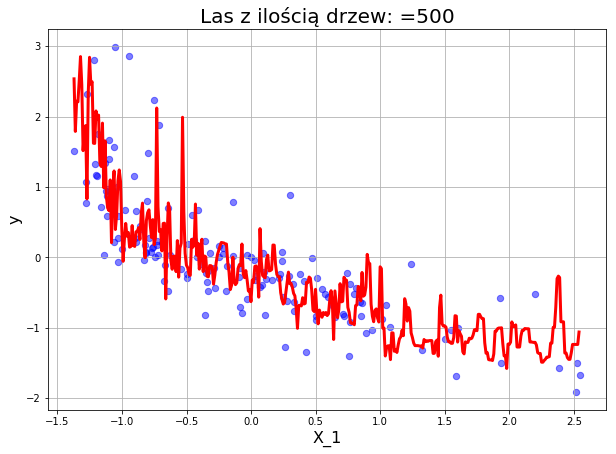

In [69]:
for l in [1, 20, 500]:
    reg_tree = RandomForestRegressor(n_estimators=200)
    reg_tree.fit(X_train, y_train.ravel())
    hlp.plot_regression(X=X_test, 
                        y=y_test, 
                        reg=reg_tree, 
                        title='Las z ilością drzew: ={}'.format(l))

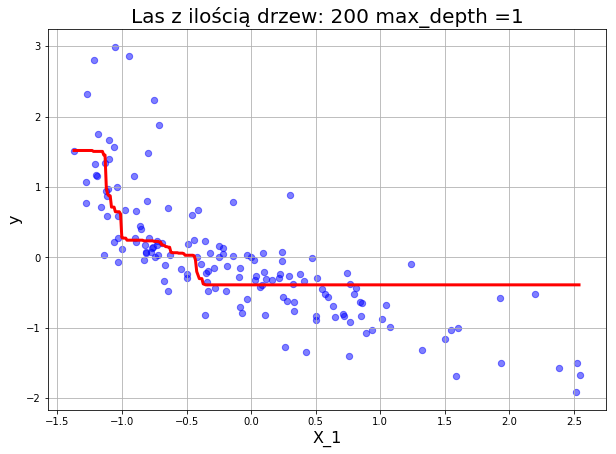

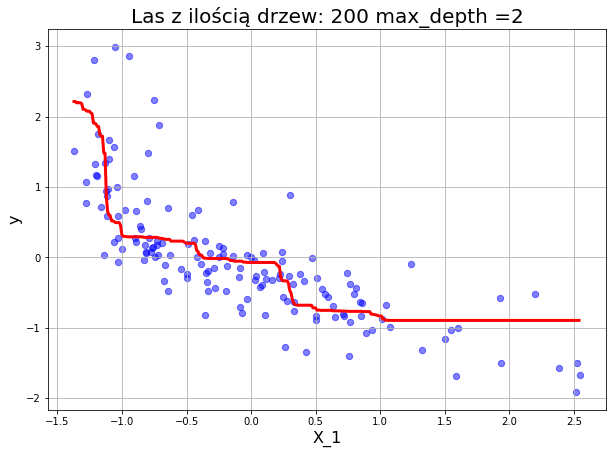

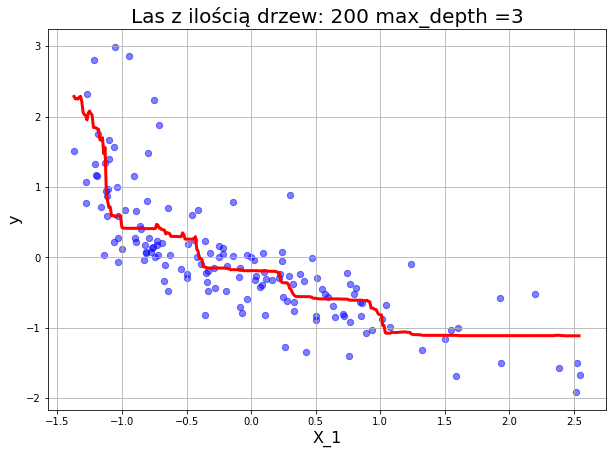

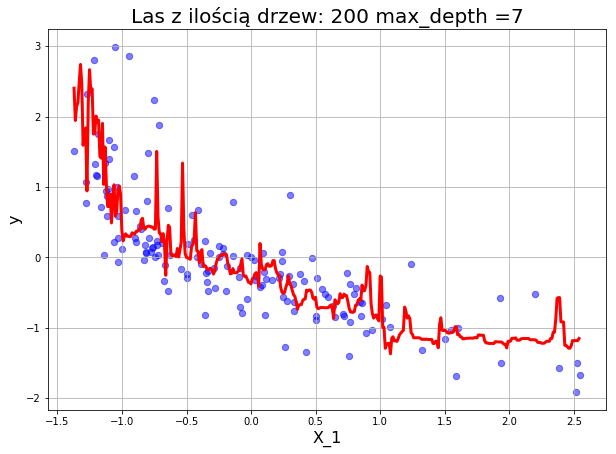

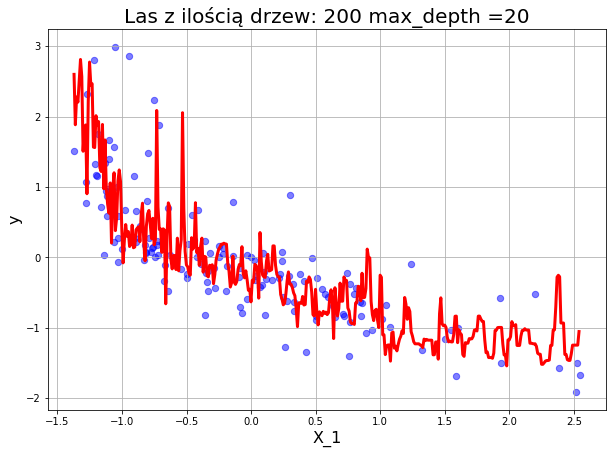

In [70]:
for d in [1, 2, 3, 7, 20]:
    reg_tree = RandomForestRegressor(n_estimators=200, max_depth=d)
    reg_tree.fit(X_train, y_train.ravel())
    hlp.plot_regression(X=X_test, 
                        y=y_test, 
                        reg=reg_tree, 
                        title='Las z ilością drzew: 200 max_depth ={}'.format(d))

In [72]:
from sklearn.ensemble import ExtraTreesRegressor

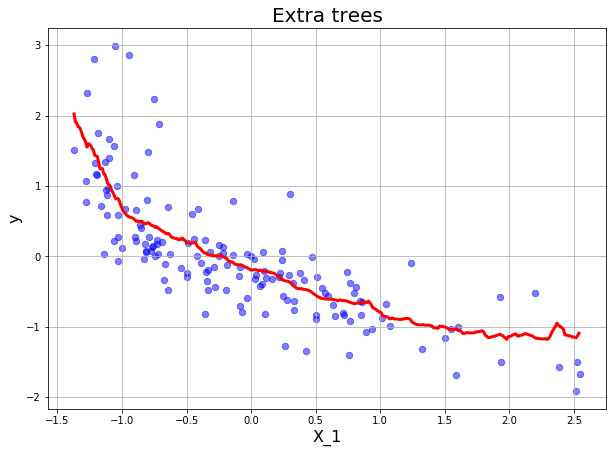

In [75]:
reg_ex = ExtraTreesRegressor(n_estimators=200, max_depth=5)
reg_ex.fit(X_train, y_train.ravel())
hlp.plot_regression(X=X_test, 
                    y=y_test, 
                    reg=reg_ex, 
                    title='Extra trees')

# Ocena modeli

In [76]:
y_pred_scaled = reg_ex.predict(X_test)

In [80]:
y_pred_r = scaler_y.inverse_transform(y_pred_scaled)

In [81]:
y_test_r = scaler_y.inverse_transform(y_test)

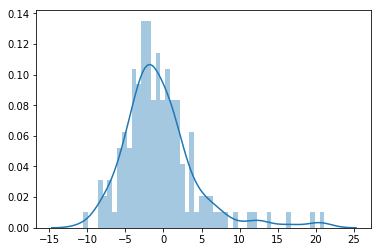

In [89]:
sns.distplot((y_test_r.ravel()-y_pred_r.ravel()), bins=50)

In [92]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [96]:
mae = mean_absolute_error(y_test_r, y_pred_r)

In [97]:
mae

3.5395190176509437

In [98]:
mse = mean_squared_error(y_test_r, y_pred_r)

In [99]:
mse

24.163181928367777

In [100]:
np.sqrt(mse)

4.91560595739404

In [101]:
from sklearn.model_selection import KFold

In [102]:
kfold = KFold(n_splits=10, shuffle=True)

In [110]:
def get_cv_error(model):
    err_cv = []
    for train_idx, test_idx in kfold.split(X):
        X_train = X[train_idx]
        X_test = X[test_idx]
        y_test = y[test_idx]
        y_train = y[train_idx]

        model.fit(X_train, y_train.ravel())

        y_pred_scaled = model.predict(X_test)

        y_pred_r = scaler_y.inverse_transform(y_pred_scaled)
        y_test_r = scaler_y.inverse_transform(y_test)

        mae = mean_absolute_error(y_pred_r, y_test_r)
        err_cv.append(mae)

    return np.array(err_cv).mean(), np.array(err_cv).std()

In [111]:
np.array(err_cv).mean()

3.8279615717418123

In [112]:
reg_ex = ExtraTreesRegressor(n_estimators=200, max_depth=5)
get_cv_error(reg_ex)

3.6276218694809392
3.9136118604389494
3.821637287319198
3.8209979221544277
3.2766103544461647
3.8861079966026986
4.256754033088152
3.415130562902092
4.15187137603373
4.341322499200538


(3.851166576166689, 0.32745905490665644)

In [113]:
estimators = []
max_depth = []
mae_mean = []
mae_std = []

for e in [2, 20, 100, 200]:
    for d in [1, 3, 5, 7, 20]:
        reg_ex = ExtraTreesRegressor(n_estimators=e, max_depth=d)
        mean, std = get_cv_error(reg_ex)
        estimators.append(e)
        max_depth.append(d)
        mae_mean.append(mean)
        mae_std.append(std)

5.714446517540443
7.077891789273849
5.306204167091237
5.659173087408114
5.321498694779117
6.857523914643121
4.2200965473145775
5.313303136240844
4.435244292464208
6.168743469058956
4.049392464203271
4.2605040974563
4.4558163404947955
4.468891009403596
4.583394966253691
4.841730702498113
4.291656169015329
6.088113861099242
4.274816368480447
4.725881403207185
4.117596885797962
3.853953314745685
3.9536400660387128
4.59176388713537
3.5467538202842217
3.0136152392056736
4.618163826208615
3.7861134920634925
3.547766569691807
3.978593362763184
4.275501816881052
3.9738136295813637
3.689951297785876
4.903264881028872
4.586502091838381
3.796983193856505
3.462804493392582
4.130315105564648
4.0968448532106825
4.383020111156717
6.410784313725489
4.745588235294118
5.104411764705882
4.622549019607843
4.697712418300655
4.026307189542484
5.292666666666666
6.064333333333333
4.974499999999999
5.1405
5.814728956553148
4.7317710674376015
5.272753603025322
4.268307904424861
6.17972291778457
5.46099507872429

In [114]:
scores = pd.DataFrame({'n_estimators': estimators,
                      'max_depth': max_depth,
                      'MAE_mean':mae_mean,
                      'MAE_std': mae_std})

In [117]:
scores[scores['MAE_mean'] == scores['MAE_mean'].min()]

,n_estimators,max_depth,MAE_mean,MAE_std
17,200,5,3.848733,0.33747
